# Simple and Multiple Linear Regresion

In [14]:
import pandas as pd
from sklearn import linear_model
import numpy as np

In [15]:
data = "E:\\Python\\Data\\200_data.csv"
df = pd.read_csv(data)
df.head()

,Gender,Religion,HomeTown,LearningStyle,Math_Score,Science_Score,Study_hours
0,Male,Hindu,Rural,Visual,89,98,5
1,Female,Christian,Urban,Auditory,87,87,4
2,Male,Budhist,Rural,Kinesthetic,84,84,3
3,Female,Others,Urban,Visual,86,86,5
4,Female,Hindu,Rural,Auditory,82,82,5


In [16]:
regr = linear_model.LinearRegression()
train_x = df[['Math_Score']]
train_y = df[['Science_Score']]
regr.fit(train_x, train_y)

print("Coeffiecient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coeffiecient:  [[0.22690706]]
Intercept:  [60.81516067]


In [17]:
import matplotlib.pyplot as plt

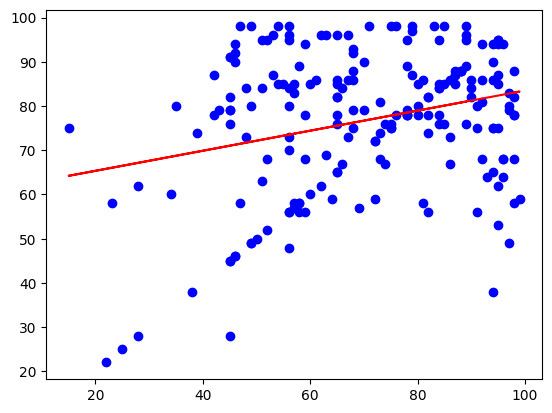

In [18]:
plt.scatter(df.Math_Score, df.Science_Score, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.show()

## Evaluation of the Model 

In [19]:
from sklearn.metrics import r2_score

In [20]:
test_x = np.asanyarray(df[['Math_Score']])
test_y = np.asanyarray(df[['Science_Score']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))


Mean absolute error: 12.27
Residual sum of squares (MSE): 233.44
R2-score: 0.08


e:\Python\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Multiple Linear Regression

In [21]:
df.head()

,Gender,Religion,HomeTown,LearningStyle,Math_Score,Science_Score,Study_hours
0,Male,Hindu,Rural,Visual,89,98,5
1,Female,Christian,Urban,Auditory,87,87,4
2,Male,Budhist,Rural,Kinesthetic,84,84,3
3,Female,Others,Urban,Visual,86,86,5
4,Female,Hindu,Rural,Auditory,82,82,5


In [22]:
regr = linear_model.LinearRegression()
x = df[['Math_Score', 'Study_hours']]
y = df[['Science_Score']]
regr.fit(x, y)

print("Coeffiecient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coeffiecient:  [[0.06190124 4.9795325 ]]
Intercept:  [54.54709185]


# Prediction Model 

In [23]:
y_hat = regr.predict(df[['Math_Score', 'Study_hours']])
x_value = np.asanyarray(df[['Math_Score', 'Study_hours']])
y_value = np.asanyarray(df['Science_Score'])

print("Mean Squred Error (MSE): %.2f" % np.mean((y_hat-y_value)**2))

print("Varience Score: %.2f" % regr.score(x_value, y_value))

Mean Squred Error (MSE): 297.22
Varience Score: 0.18


e:\Python\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Study Hours Vs. Math_score

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
X = df[['Study_hours']]
y = df['Math_Score']

### Splitting Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1), (40, 1), (160,), (40,))

### Building Model

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Prediction 

In [40]:
y_pred = model.predict(X_test)
y_pred

array([82.71140069, 73.65465684, 73.65465684, 55.54116914, 64.59791299,
       64.59791299, 82.71140069, 64.59791299, 55.54116914, 55.54116914,
       73.65465684, 64.59791299, 64.59791299, 55.54116914, 82.71140069,
       55.54116914, 73.65465684, 64.59791299, 82.71140069, 64.59791299,
       82.71140069, 73.65465684, 64.59791299, 73.65465684, 64.59791299,
       73.65465684, 64.59791299, 64.59791299, 82.71140069, 64.59791299,
       82.71140069, 46.48442529, 64.59791299, 64.59791299, 82.71140069,
       73.65465684, 82.71140069, 73.65465684, 82.71140069, 64.59791299])

## Prediction of New Data Values (Unknown Values)

In [50]:
new_stud_hours = [[3.5], [9.3], [2.5], [8.5]]
new_prediction = model.predict(new_stud_hours)
new_prediction

e:\Python\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 69.12628491, 121.65539923,  60.06954107, 114.41000415])

### Evaluation of the Model 

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(450.52810794166544, 0.07469025917240169)

### Coeficients and Intercept

In [42]:
model.coef_, model.intercept_

(array([9.05674385]), 37.427681445332794)

The Model is: 
$Math\ Score = 37.427681445332794 + 9.05674385 * Study\ Hours$

### Plotting the regression line

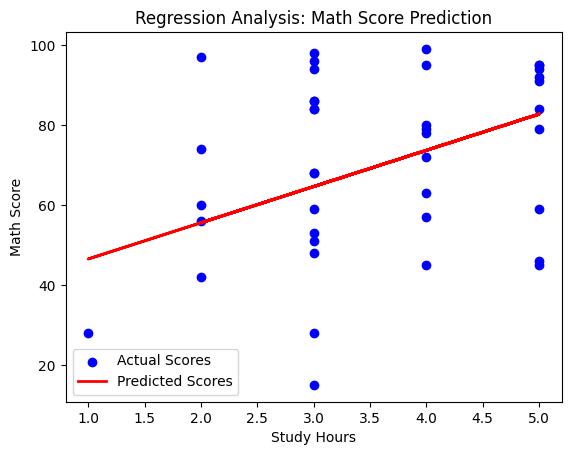

In [44]:
plt.scatter(X_test, y_test, color='blue', label = 'Actual Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2, label = 'Predicted Scores')

plt.xlabel('Study Hours')
plt.ylabel('Math Score')
plt.title('Regression Analysis: Math Score Prediction')

plt.legend()
plt.show()

## Polynomial Regression for Math Score Prediction

Polynomial Regression MSE: 445.86774410729197
Polynomial Regression R^2: 0.08426187074498037


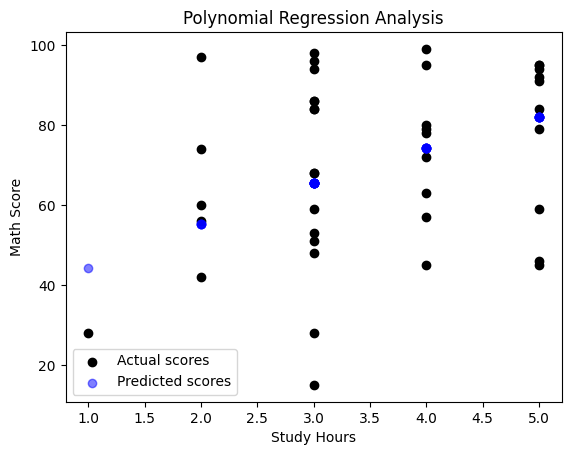

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Prepare data
X_poly = df[['Study_hours']]
y_poly = df['Math_Score']

# Split data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Build polynomial regression model
degree = 2  # Degree of the polynomial features
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train_poly, y_train_poly)

# Predict
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

# Output results and plotting
print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R^2:", r2_poly)

plt.scatter(X_test_poly, y_test_poly, color='black', label='Actual scores')
plt.scatter(X_test_poly, y_pred_poly, color='blue', label='Predicted scores', alpha=0.5)
plt.xlabel('Study Hours')
plt.ylabel('Math Score')
plt.title('Polynomial Regression Analysis')
plt.legend()
plt.show()


In [24]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

## Creating Synthetic Data 

In [25]:
np.random.seed(0) # seed for reproducibility
hours_studied = np.random.rand(100, 1)
scores = 50 + 15 * hours_studied + np.random.rand(100, 1)

## Creating DataFrame

In [26]:
data = pd.DataFrame({
    'Hours Studied': hours_studied.flatten(), # flatten() to convert 2D array to 1D array
    'Scores': scores.flatten() # flatten() to convert 2D array to 1D array
})
data

,Hours Studied,Scores
0,0.548814,58.910019
1,0.715189,60.997848
2,0.602763,59.776645
3,0.544883,59.135436
4,0.423655,56.603575
...,...,...
95,0.183191,53.238329
96,0.586513,59.025109
97,0.020108,50.555970
98,0.828940,62.492130


## Splitting the data into training and test sets 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data[['Hours Studied']], data['Scores'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

In [28]:
X_test

,Hours Studied
83,0.692472
53,0.102045
70,0.976459
45,0.670638
44,0.666767
39,0.681820
22,0.461479
80,0.317983
10,0.791725
0,0.548814


## Creating the Model 

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicting the Scores 

In [30]:
y_pred = model.predict(X_test)
y_pred

array([60.90228178, 52.08260054, 65.14442613, 60.57612627, 60.51829977,
       60.74316709, 57.45175966, 55.30824331, 62.38490139, 58.75633904,
       62.18222112, 54.51015334, 59.59333373, 59.0494252 , 55.31699347,
       56.88674415, 54.78278824, 52.35374764, 59.04360861, 62.12361924])

## Finding the Coeffients and Intercepts

In [ ]:
model.coef_, model.intercept_

(array([14.93779356]), 50.558276220564544)

## Evaluating the Model 

In [ ]:
mse = mean_squared_error(y_test, y_pred) # Mean Squared Error
r2 = r2_score(y_test, y_pred) # R2 Score

print(f"Model Coefficients: {model.coef_[0]}") 
print(f"Model Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Model Coefficients: 14.937793557185575
Model Intercept: 50.558276220564544
Mean Squared Error: 0.06606897290334053
R-squared: 0.9945133500945184


## Plotting the Results

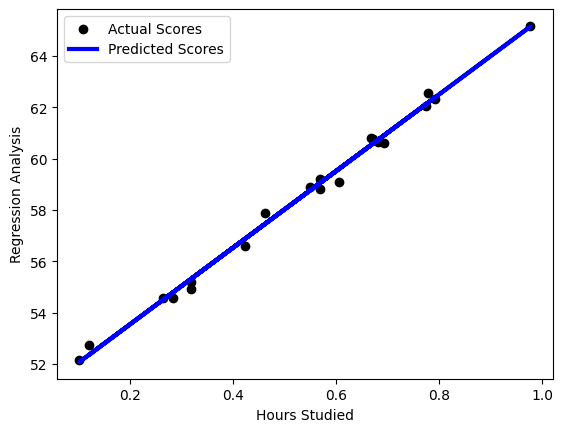

In [ ]:
plt.scatter(X_test, y_test, color='black', label = 'Actual Scores')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label = 'Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Regression Analysis')
plt.legend()
plt.show()

In [51]:
df.columns

Index(['Gender', 'Religion', 'HomeTown', 'LearningStyle', 'Math_Score',
       'Science_Score', 'Study_hours'],
      dtype='object')

In [52]:
X = df[['Math_Score']]
y = df['Science_Score']

## Splittig the data into training and testing data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1), (40, 1), (160,), (40,))

## Developing Models 

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicting the models (X_test)

In [55]:
y_pred = model.predict(X_test)
y_pred

array([80.22345476, 82.52184817, 72.07460536, 78.13400619, 73.3282745 ,
       74.99983335, 72.07460536, 76.88033706, 71.4477708 , 75.20877821,
       74.58194364, 76.88033706, 83.14868274, 82.93973789, 82.52184817,
       74.37299878, 79.38767533, 82.73079303, 74.99983335, 80.64134447,
       81.68606875, 77.71611648, 65.80625968, 79.17873048, 68.52254281,
       75.83561278, 73.74616421, 82.31290332, 81.89501361, 72.70143993,
       72.28355022, 68.52254281, 80.22345476, 80.64134447, 82.52184817,
       83.3576276 , 79.17873048, 78.96978562, 82.31290332, 80.22345476])

## Prediction of Unknown Values 

In [57]:
new_math_score = [[33.33], [25.76], [99], [54], [76]]
new_prediction = model.predict(new_math_score)
new_prediction

e:\Python\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.63621889, 68.05450633, 83.3576276 , 73.95510907, 78.55189591])

## Evaluation of the Model

In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R-squred value:', r2)

MSE: 261.8022349908023
R-squred value: 0.0933079302729195


## Plotting the Graph

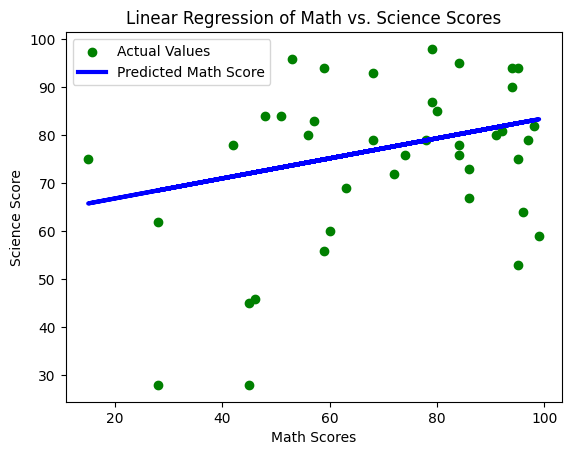

In [65]:
plt.scatter(X_test, y_test, color = 'green', label = 'Actual Values')
plt.plot(X_test, y_pred, color = 'blue', linewidth = 3, label = 'Predicted Math Score')
plt.xlabel('Math Scores')
plt.ylabel('Science Score')

plt.title('Linear Regression of Math vs. Science Scores')
plt.legend()
plt.show()